<a href="https://colab.research.google.com/github/claudio1975/Medium-blog/blob/master/Langchain_%26_OpenAI_in_Action/Image_Data_Analysis_with_LangChain_%26_OpenAI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries and prepare Workspace

datasource: https://www.kaggle.com/datasets/gpiosenka/sports-classification

The picture used is coming from 100 Sports Image Classification dataset.

Images are gathered from internet searches. All images are resized to 224 X 224 X 3 and converted to jpg format. The collection of sports images cover 100 different type of sports.


In [1]:
# Install the langchain package
!pip install langchain &> /dev/null

In [2]:
# Install the langchain package with openai
!pip install -U langchain-openai &> /dev/null

In [4]:
# Import the os package
import os
# Import the openai package
import openai
# Set openai.api_key to the OPENAI_API_KEY environment variable
os.environ["OPENAI_API_KEY"] = " "

In [5]:
# Import the langchain package as lc
import langchain as lc

# From the langchain.chat_models module, import ChatOpenAI
from langchain_openai import ChatOpenAI

# From the langchain.schema module, import AIMessage, HumanMessage, SystemMessage
from langchain.schema import AIMessage, HumanMessage, SystemMessage

In [6]:
# Import pandas using the alias pd
import pandas as pd
from skimage import io
from skimage.io import imread

# From the IPython.display package, import display and Markdown
from IPython.display import display, Markdown

In [7]:
# Create a ChatOpenAI object. Assign to chat.
chat = ChatOpenAI(temperature=0, model_name='gpt-3.5-turbo')

In [8]:
lc.__version__

'0.1.6'

In [9]:
openai.__version__

'1.12.0'

### Have a look of the data set

Shape of image


(224, 224, 3)

Dimension of image


3

Number of pixels


150528

Basketball


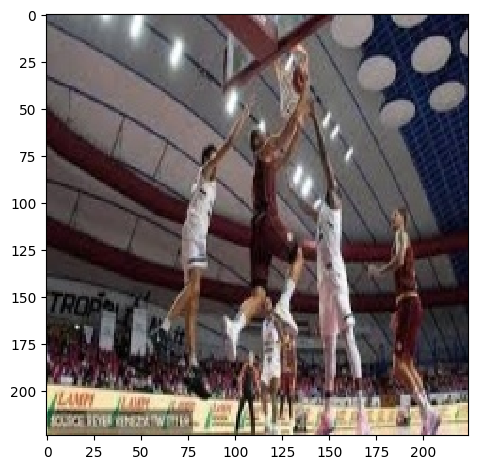

In [10]:
# Read the data.
image_1 = imread("./088.jpg")

# Display a description of the shape
print("Shape of image")
display(image_1.shape)

# Display the dimension
print("Dimension of image")
display(image_1.ndim)

# Display the number of pixels
print("Number of pixels")
display(image_1.size) # 224 X 224 X 3

print("Basketball")
io.imshow(image_1)

### Prepare the contest for GPT

In [11]:
# A description of the image
image_description = """
You have a image about sport. It is available as a image named `image_1`.

Image is 224,224,3 jpg format

"""


In [12]:
# Concatenate the image description and the context.
msgs_context = [
    SystemMessage(content="You are an expert data scientist, and you are involved in a dataset analysis."),
    HumanMessage(content=f"{image_description}")
]

### Use GPT as code assistant to run a data analysis on the image

#### Data Analysis on the colors distribution

In [13]:
# Ask GPT to provide code for a color analysis
msgs_python_colors = msgs_context+[
    HumanMessage(content=
"Write some Python code to draw a univariate distribution for each color (red, green, blue) from '088.jpg'.\
Organize a chart with 3 columns and one row.\
Use the matplotlib package")]

rsps_python_colors = chat.invoke(msgs_python_colors)

display(Markdown(rsps_python_colors.content))

Sure! Here's an example code that uses the matplotlib package to draw a univariate distribution for each color channel (red, green, blue) from the image '088.jpg':

```python
import matplotlib.pyplot as plt
import cv2

# Load the image
image_path = '088.jpg'
image = cv2.imread(image_path)

# Split the image into color channels
red_channel = image[:,:,0]
green_channel = image[:,:,1]
blue_channel = image[:,:,2]

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the univariate distribution for each color channel
axs[0].hist(red_channel.flatten(), bins=256, color='red', alpha=0.7)
axs[0].set_title('Red Channel')
axs[0].set_xlim([0, 255])

axs[1].hist(green_channel.flatten(), bins=256, color='green', alpha=0.7)
axs[1].set_title('Green Channel')
axs[1].set_xlim([0, 255])

axs[2].hist(blue_channel.flatten(), bins=256, color='blue', alpha=0.7)
axs[2].set_title('Blue Channel')
axs[2].set_xlim([0, 255])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
```

Make sure you have the `matplotlib` and `cv2` packages installed before running this code. The resulting plot will display the univariate distribution for each color channel in separate subplots.

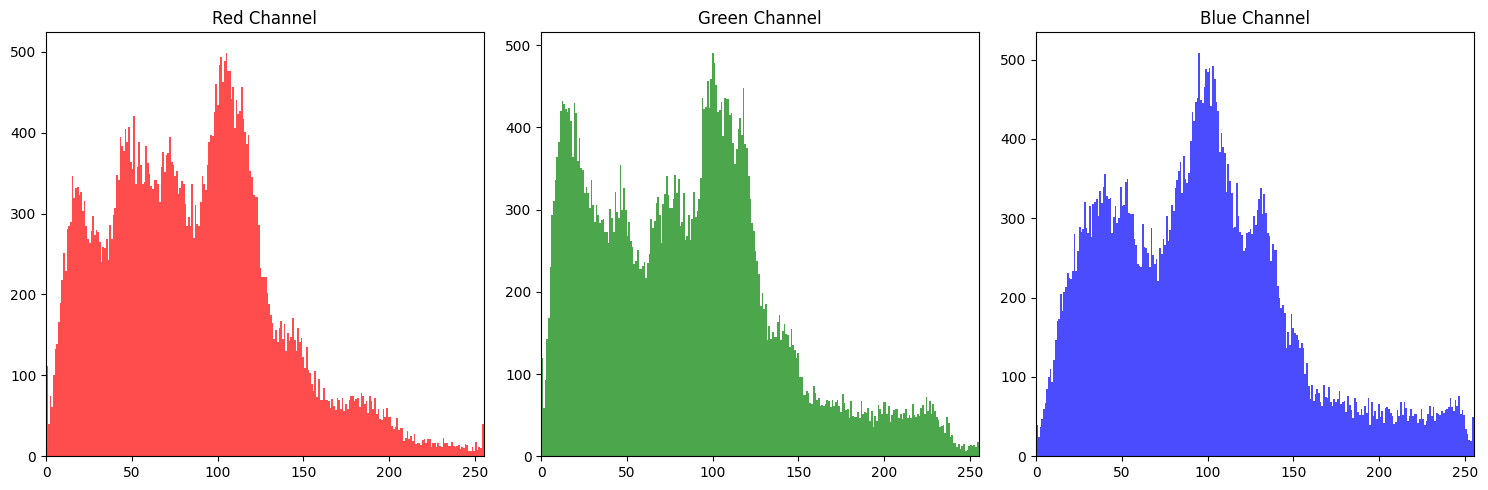

In [14]:
import matplotlib.pyplot as plt
import cv2

# Load the image
image_path = '088.jpg'
image = cv2.imread(image_path)

# Split the image into color channels
red_channel = image[:,:,0]
green_channel = image[:,:,1]
blue_channel = image[:,:,2]

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the univariate distribution for each color channel
axs[0].hist(red_channel.flatten(), bins=256, color='red', alpha=0.7)
axs[0].set_title('Red Channel')
axs[0].set_xlim([0, 255])

axs[1].hist(green_channel.flatten(), bins=256, color='green', alpha=0.7)
axs[1].set_title('Green Channel')
axs[1].set_xlim([0, 255])

axs[2].hist(blue_channel.flatten(), bins=256, color='blue', alpha=0.7)
axs[2].set_title('Blue Channel')
axs[2].set_xlim([0, 255])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### Data Analysis on Image Segmentation

In [15]:
# Ask GPT to provide code for a image segmentation
msgs_python_segmentation = msgs_context+[
    HumanMessage(content=
"Write some Python code to draw a image segmentation from '088.jpg'.\
Use the scikit-image package")]

rsps_python_segmentation = chat.invoke(msgs_python_segmentation)

display(Markdown(rsps_python_segmentation.content))

Sure! To draw an image segmentation using the scikit-image package, you can follow these steps:

1. Install the scikit-image package if you haven't already. You can do this by running `pip install scikit-image` in your terminal.

2. Import the necessary libraries:

```python
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.segmentation import slic
from skimage.color import label2rgb
```

3. Load the image:

```python
image = imread('088.jpg')
```

4. Perform image segmentation using the SLIC algorithm:

```python
segments = slic(image, n_segments=100, compactness=10, sigma=1)
```

5. Convert the segmented image into a color image:

```python
segmented_image = label2rgb(segments, image, kind='avg')
```

6. Display the original and segmented images:

```python
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].imshow(image)
ax[0].set_title('Original Image')

ax[1].imshow(segmented_image)
ax[1].set_title('Segmented Image')

plt.tight_layout()
plt.show()
```

This code will display the original image on the left and the segmented image on the right. You can adjust the parameters of the `slic` function (e.g., `n_segments`, `compactness`, `sigma`) to control the level of segmentation.

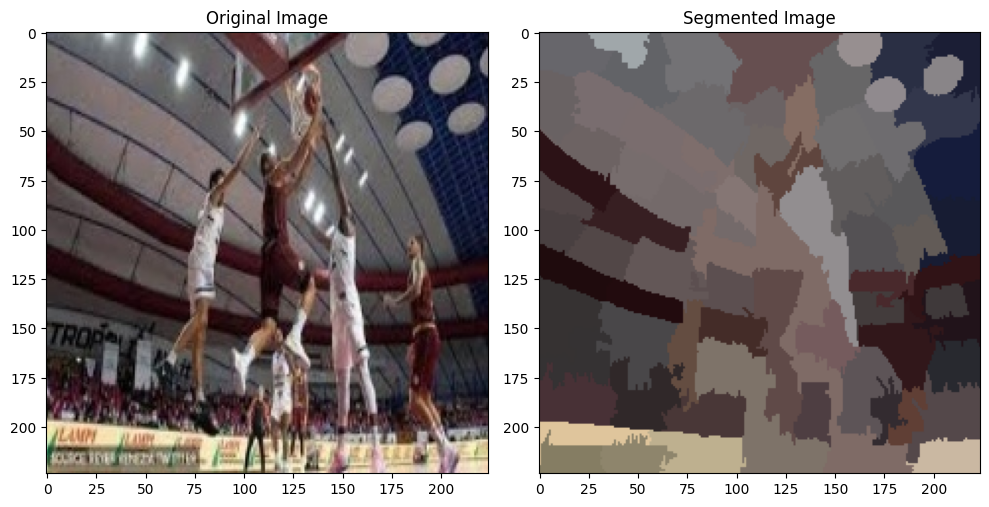

In [17]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.segmentation import slic
from skimage.color import label2rgb

# Load the image
image = imread('088.jpg')

# Perform image segmentation using SLIC algorithm
segments = slic(image, n_segments=100, compactness=10)

#Convert the segmented image into a color image
segmented_image = label2rgb(segments, image, kind='avg')

# Display the original image and the segmented image
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original Image')

ax[1].imshow(segmented_image)
ax[1].set_title('Segmented Image')

plt.tight_layout()
plt.show()

#### Data Analysis on Binary Image

In [18]:
# Ask GPT to provide code for a binary image
msgs_python_binary_image = msgs_context+[
    HumanMessage(content=
"Write some Python code to draw a binary image from '088.jpg' using thresholding.\
Use the scikit-image package")]

rsps_python_binary_image = chat.invoke(msgs_python_binary_image)

display(Markdown(rsps_python_binary_image.content))

Sure! Here's an example code using the scikit-image package to draw a binary image from the given image using thresholding:

```python
import matplotlib.pyplot as plt
from skimage import io, filters

# Load the image
image_path = '088.jpg'
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = image.mean(axis=2)

# Apply thresholding to create a binary image
threshold = filters.threshold_otsu(gray_image)
binary_image = gray_image > threshold

# Display the original and binary images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Binary Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()
```

Make sure you have the scikit-image package installed (`pip install scikit-image`) before running this code. This code will display the original image and the binary image side by side. The binary image is created by applying thresholding to the grayscale version of the original image using the Otsu thresholding method.

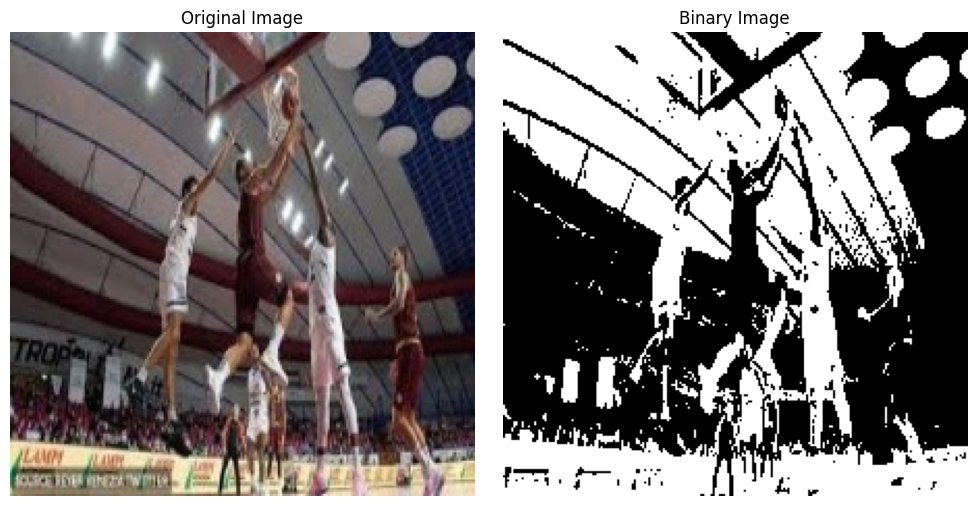

In [19]:
import matplotlib.pyplot as plt
from skimage import io, filters

# Load the image
image_path = '088.jpg'
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = image.mean(axis=2)

# Apply thresholding to create a binary image
threshold = filters.threshold_otsu(gray_image)
binary_image = gray_image > threshold

# Display the original and binary images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Binary Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()
